In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm
import statsmodels.tsa.vector_ar.vecm as vecm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts

## testing armington elastcities UK gas market ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/petrol_arm.csv'
df = pd.read_csv(url)

In [2]:
print(df)

       Date  ConsRatio  PriceRatio  ConsRatioL  Q1  Q2  Q3  Q4  PriceRat2
0    Mar-06  -0.803231    0.143038         NaN   1   0   0   0   0.109982
1    Jun-06  -0.740313    0.052014   -0.803231   0   1   0   0   0.077153
2   Sept-06  -0.795364    0.167691   -0.740313   0   0   1   0   0.023132
3    Dec-06  -0.482442    0.217325   -0.795364   0   0   0   1  -0.023184
4    Mar-07  -0.400200    0.201160   -0.482442   1   0   0   0  -0.023241
..      ...        ...         ...         ...  ..  ..  ..  ..        ...
59   Dec-20  -0.696740    0.455440   -0.082779   0   0   0   1  -0.037717
60   Mar-21   0.425316    0.276913   -0.696740   1   0   0   0   0.034152
61   Jun-21  -0.331717    0.202427    0.425316   0   1   0   0   0.093769
62  Sept-21  -0.336606    0.222178   -0.331717   0   0   1   0   0.070031
63   Dec-21  -0.745841    0.302228   -0.336606   0   0   0   1  -0.022653

[64 rows x 9 columns]


In [3]:
lag_order1 = vecm.select_order(data=df[['ConsRatio', 'PriceRat2']], maxlags=5, deterministic="ci", exog=df[['Q1','Q2','Q3','Q4']])
print(lag_order1.selected_orders)

rank = vecm.select_coint_rank(endog=df[['ConsRatio', 'PriceRat2']],
                              k_ar_diff=5,
                              det_order=0)

print(rank)

{'aic': 1, 'bic': 0, 'hqic': 0, 'fpe': 1}
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          20.31          15.49
  1   2          6.075          3.841
-------------------------------------


In [4]:
m1 = vecm.VECM(df[['ConsRatio', 'PriceRat2']], deterministic="ci", k_ar_diff=1, coint_rank=1)  
vecm_res_1 = m1.fit()
vecm_res_1.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.ConsRatio,-0.6083,0.105,-5.781,0.000,-0.815,-0.402
L1.PriceRat2,-2.3289,0.830,-2.805,0.005,-3.956,-0.702
,coef,std err,z,P>|z|,[0.025,0.975]
L1.ConsRatio,0.0030,0.014,0.220,0.826,-0.024,0.030
L1.PriceRat2,0.2387,0.107,2.233,0.026,0.029,0.448
,coef,std err,z,P>|z|,[0.025,0.975]
ec1,0.0297,0.058,0.511,0.609,-0.084,0.144
,coef,std err,z,P>|z|,[0.025,0.975]
ec1,0.0434,0.007,5.805,0.000,0.029,0.058
,coef,std err,z,P>|z|,[0.025,0.975]


In [5]:
granger_results = vecm_res_1.test_granger_causality(caused="ConsRatio", signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
2.362,3.080,0.099,"(2, 108)"


                            OLS Regression Results                            
Dep. Variable:              ConsRatio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.03123
Date:                Mon, 17 Oct 2022   Prob (F-statistic):              0.860
Time:                        20:54:27   Log-Likelihood:                -20.292
No. Observations:                  64   AIC:                             44.58
Df Residuals:                      62   BIC:                             48.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4105      0.055     -7.396      0.0

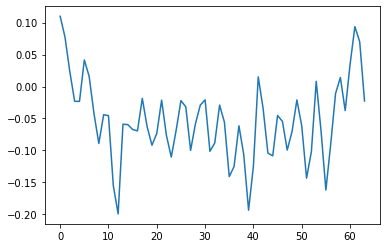

In [9]:
result1 = smf.ols(formula="ConsRatio ~ PriceRat2", data=df).fit()
print(result1.summary())
plt.plot(df['PriceRat2'])